## Python results

In [5]:
import pandas as pd

python_files_result = pd.read_csv('python_static_analysis_file_level.csv')
python_files_result

,html_url,filename,tmp_path,bandit_ok,bandit_returncode,bandit_issues_total,bandit_high,bandit_medium,bandit_low,bandit_stderr,pylint_ok,pylint_returncode,pylint_issues_total,pylint_error,pylint_warning,pylint_refactor,pylint_convention,pylint_fatal,pylint_stderr
0,https://github.com/mlflow/mlflow/pull/16449,docs/changed_pages.py,tmp_python_analysis_all/https_github.com_mlflo...,True,1,1,0,1,0,[main]\tINFO\tprofile include tests: None\n[ma...,True,28,8,0,2,1,5,0,NaN
1,https://github.com/MervinPraison/PraisonAI/pul...,examples/python/agents/context-agent.py,tmp_python_analysis_all/https_github.com_Mervi...,True,0,0,0,0,0,[main]\tINFO\tprofile include tests: None\n[ma...,True,22,55,1,15,0,39,0,NaN
2,https://github.com/MervinPraison/PraisonAI/pul...,examples/python/concepts/context-engineering-w...,tmp_python_analysis_all/https_github.com_Mervi...,True,0,0,0,0,0,[main]\tINFO\tprofile include tests: None\n[ma...,True,30,95,1,28,1,65,0,NaN
3,https://github.com/MervinPraison/PraisonAI/pul...,src/praisonai-agents/praisonaiagents/__init__.py,tmp_python_analysis_all/https_github.com_Mervi...,True,1,1,0,0,1,[main]\tINFO\tprofile include tests: None\n[ma...,True,30,49,15,6,1,27,0,NaN
4,https://github.com/MervinPraison/PraisonAI/pul...,src/praisonai-agents/praisonaiagents/agent/__i...,tmp_python_analysis_all/https_github.com_Mervi...,True,0,0,0,0,0,[main]\tINFO\tprofile include tests: None\n[ma...,True,18,8,5,0,0,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12173,https://github.com/disler/single-file-agents/p...,example-agent-codebase-arch/vertical-slice-arc...,tmp_python_analysis_all/https_github.com_disle...,True,0,0,0,0,0,[main]\tINFO\tprofile include tests: None\n[ma...,True,28,12,0,3,2,7,0,NaN
12174,https://github.com/disler/single-file-agents/p...,example-agent-codebase-arch/vertical-slice-arc...,tmp_python_analysis_all/https_github.com_disle...,True,0,0,0,0,0,[main]\tINFO\tprofile include tests: None\n[ma...,True,22,23,2,17,0,4,0,NaN
12175,https://github.com/disler/single-file-agents/p...,example-agent-codebase-arch/vertical-slice-arc...,tmp_python_analysis_all/https_github.com_disle...,True,0,0,0,0,0,[main]\tINFO\tprofile include tests: None\n[ma...,True,22,15,1,9,0,5,0,NaN
12176,https://github.com/disler/single-file-agents/p...,example-agent-codebase-arch/vertical-slice-arc...,tmp_python_analysis_all/https_github.com_disle...,True,0,0,0,0,0,[main]\tINFO\tprofile include tests: None\n[ma...,True,28,11,0,6,1,4,0,NaN


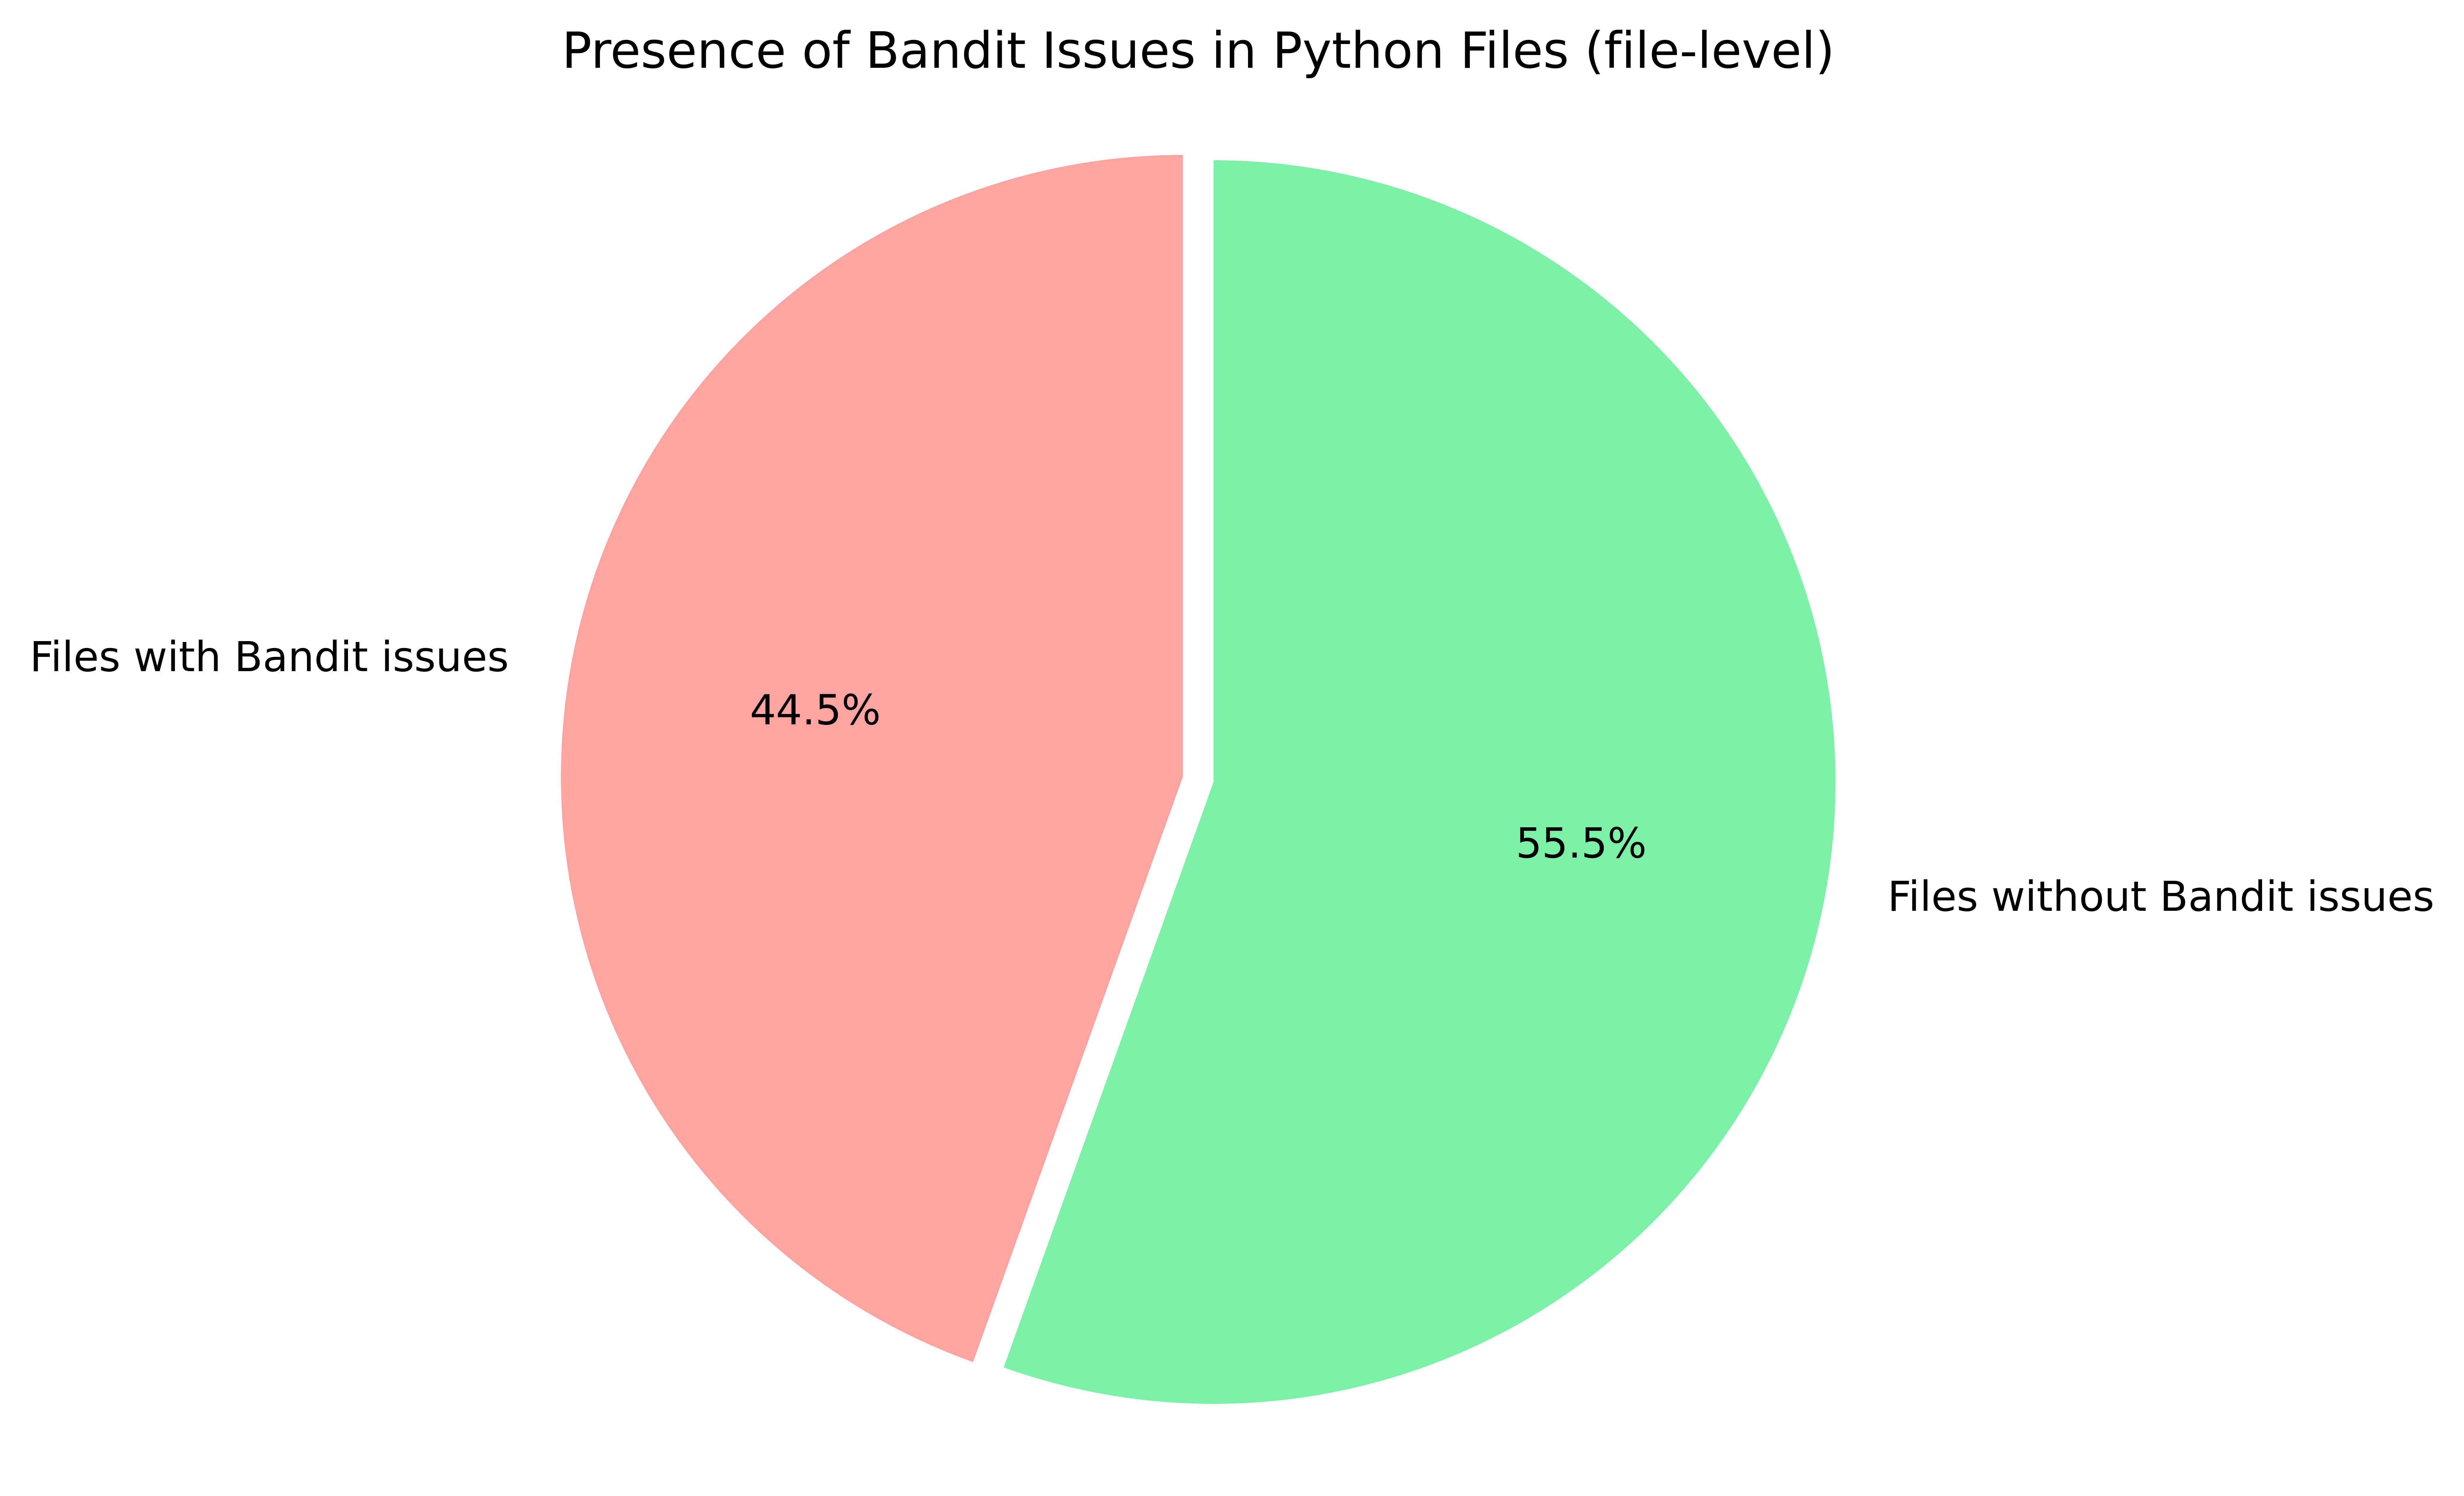

(np.int64(5422), np.int64(6756))

In [36]:
import matplotlib.pyplot as plt

files_with_issues = (python_files_result["bandit_issues_total"] > 0).sum()
files_without_issues = (python_files_result["bandit_issues_total"] == 0).sum()

labels = ["Files with Bandit issues", "Files without Bandit issues"]
sizes = [files_with_issues, files_without_issues]

colors = ["#FFA2A2", "#7BF1A8"]
explode = (0.05, 0.0)

plt.figure(figsize=(6, 6), dpi= 1000)
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
)
plt.title("Presence of Bandit Issues in Python Files (file-level)")
plt.axis("equal")
plt.show()

files_with_issues, files_without_issues

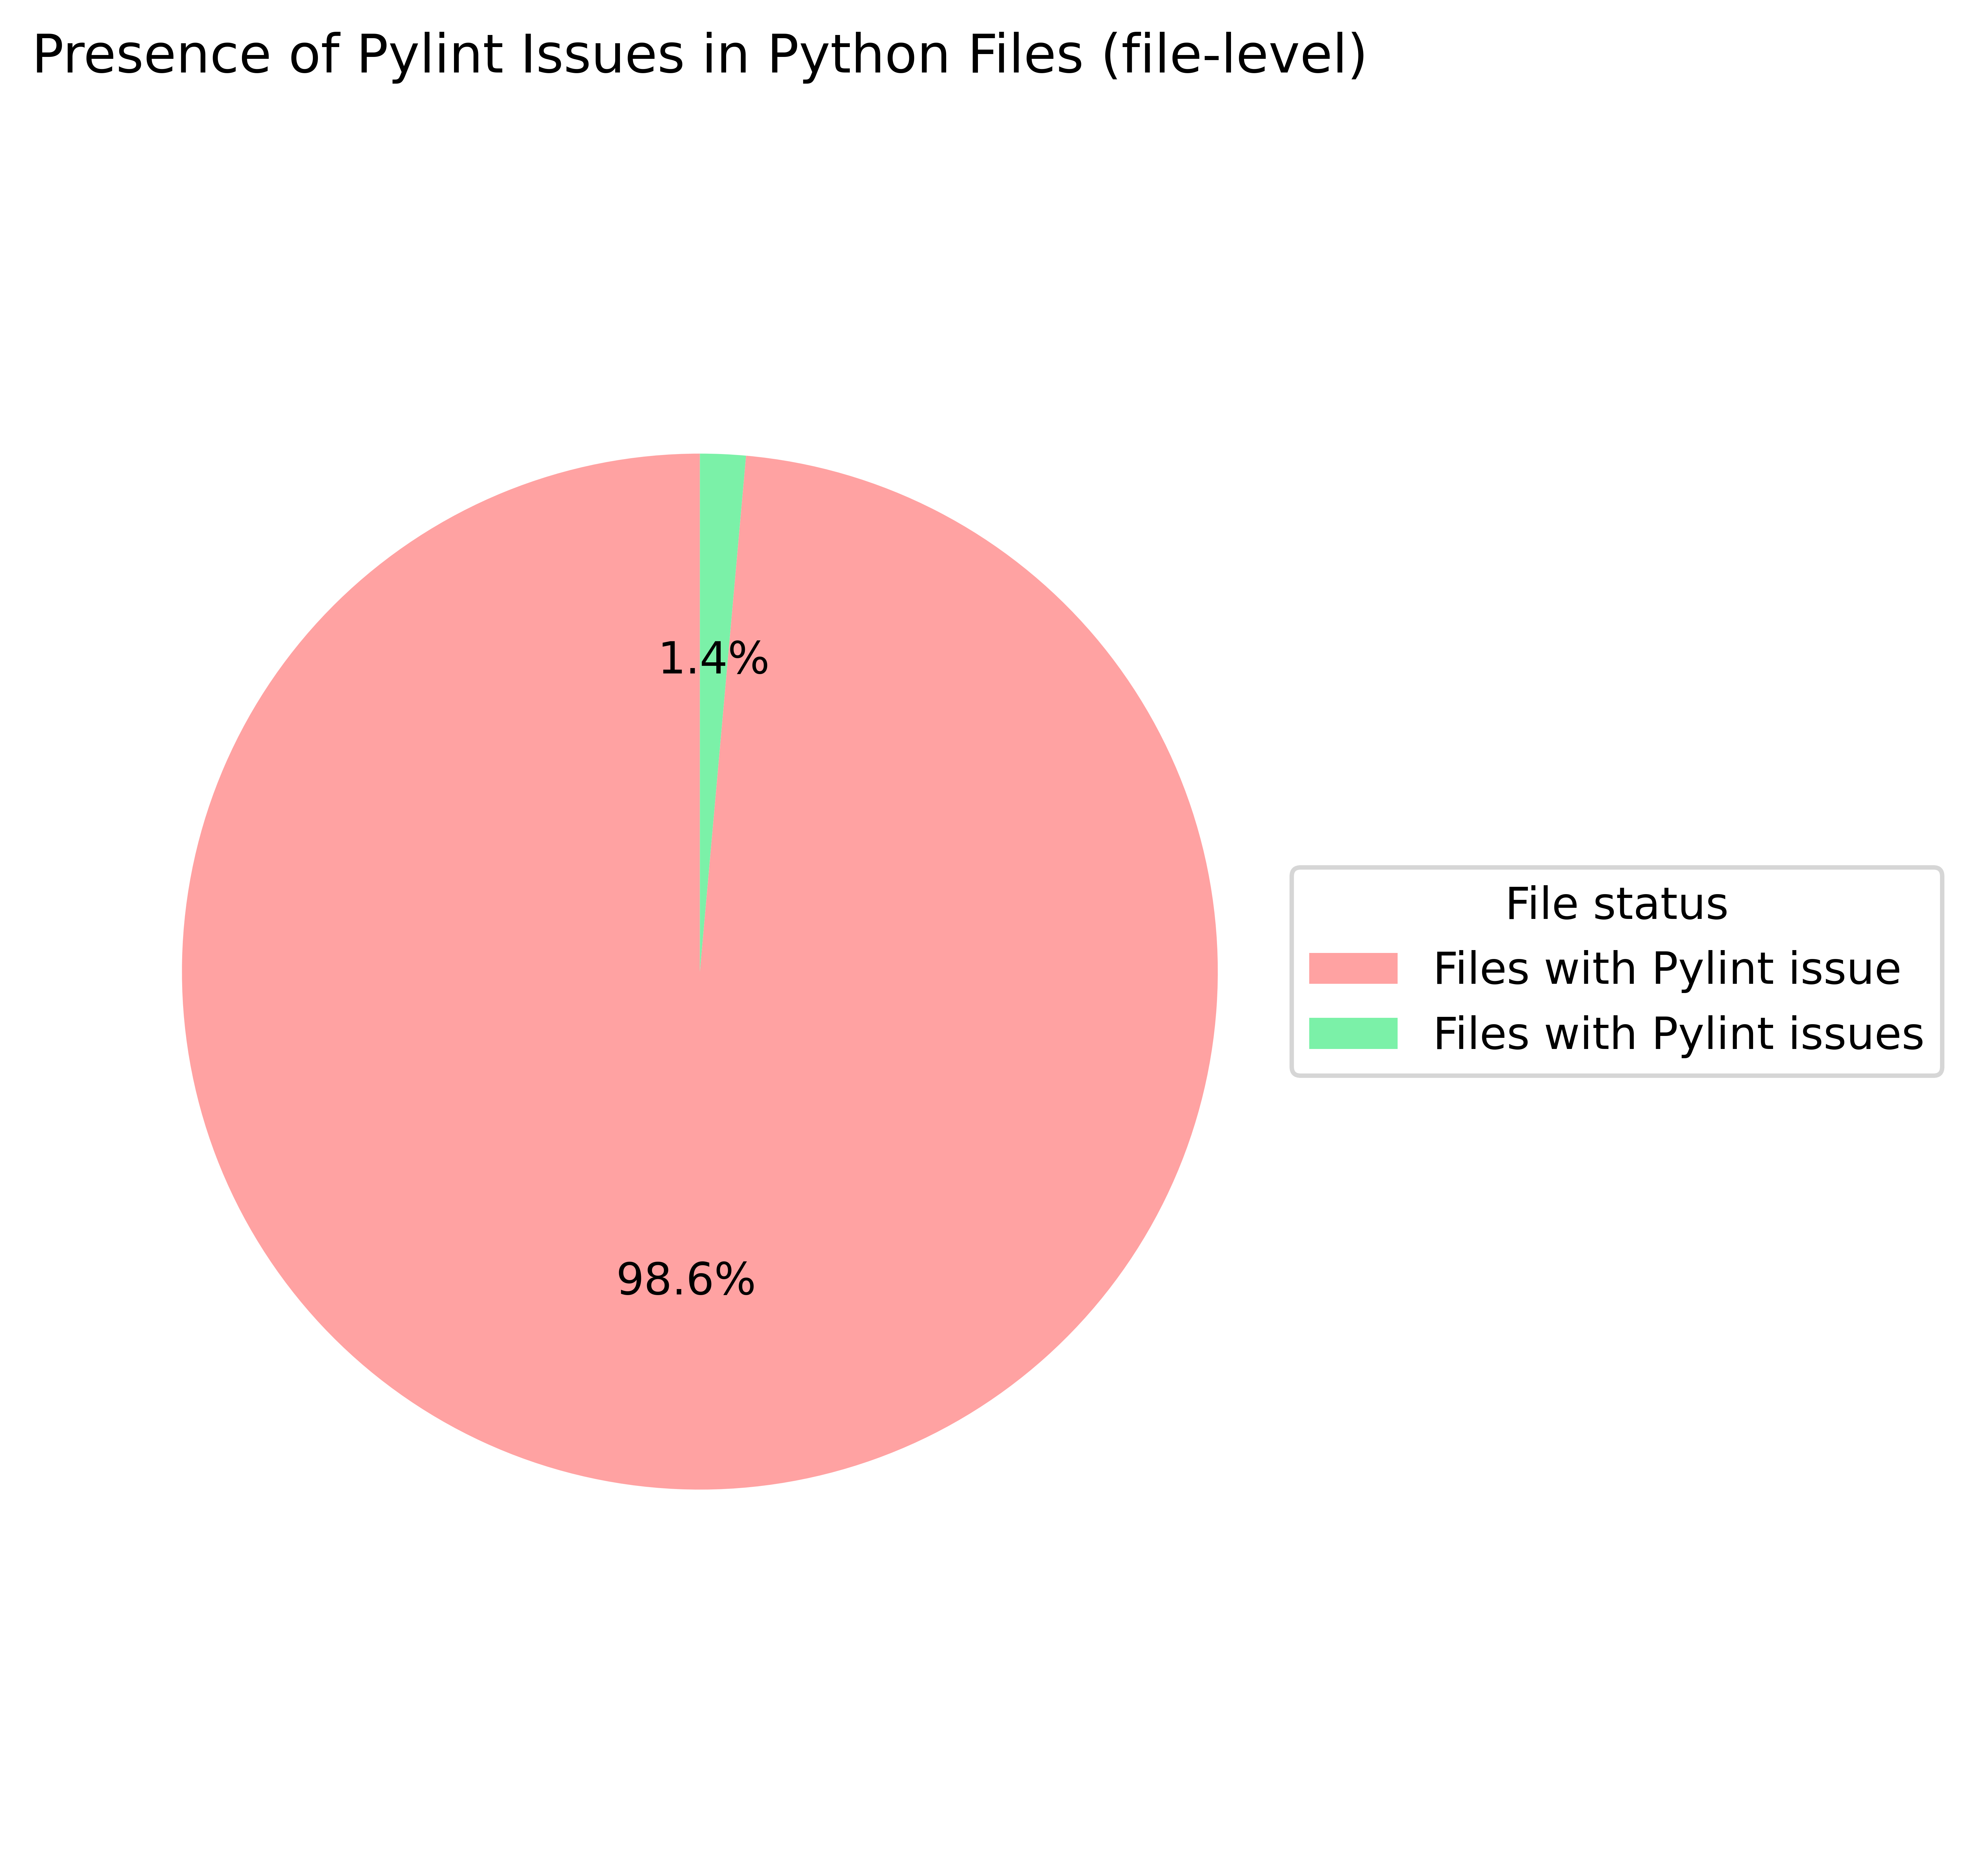

In [39]:
import matplotlib.pyplot as plt

files_with_pylint_issues = (python_files_result["pylint_issues_total"] > 0).sum()
files_without_pylint_issues = (python_files_result["pylint_issues_total"] == 0).sum()

sizes = [files_with_pylint_issues, files_without_pylint_issues]
labels = [
    "Files with Pylint issues",
    "Files without Pylint issues",
]

colors = ["#FFA2A2", "#7BF1A8"]
explode = (0.0, 0.0)

legend_labels = [
    "Files with Pylint issue",
    "Files with Pylint issues",
]

plt.figure(figsize=(6, 6), dpi=1000)
wedges, texts, autotexts = plt.pie(
    sizes,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
)
plt.legend(
    wedges,
    legend_labels,
    title="File status",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
)
plt.title("Presence of Pylint Issues in Python Files (file-level)")
plt.axis("equal")
plt.tight_layout()
plt.show()

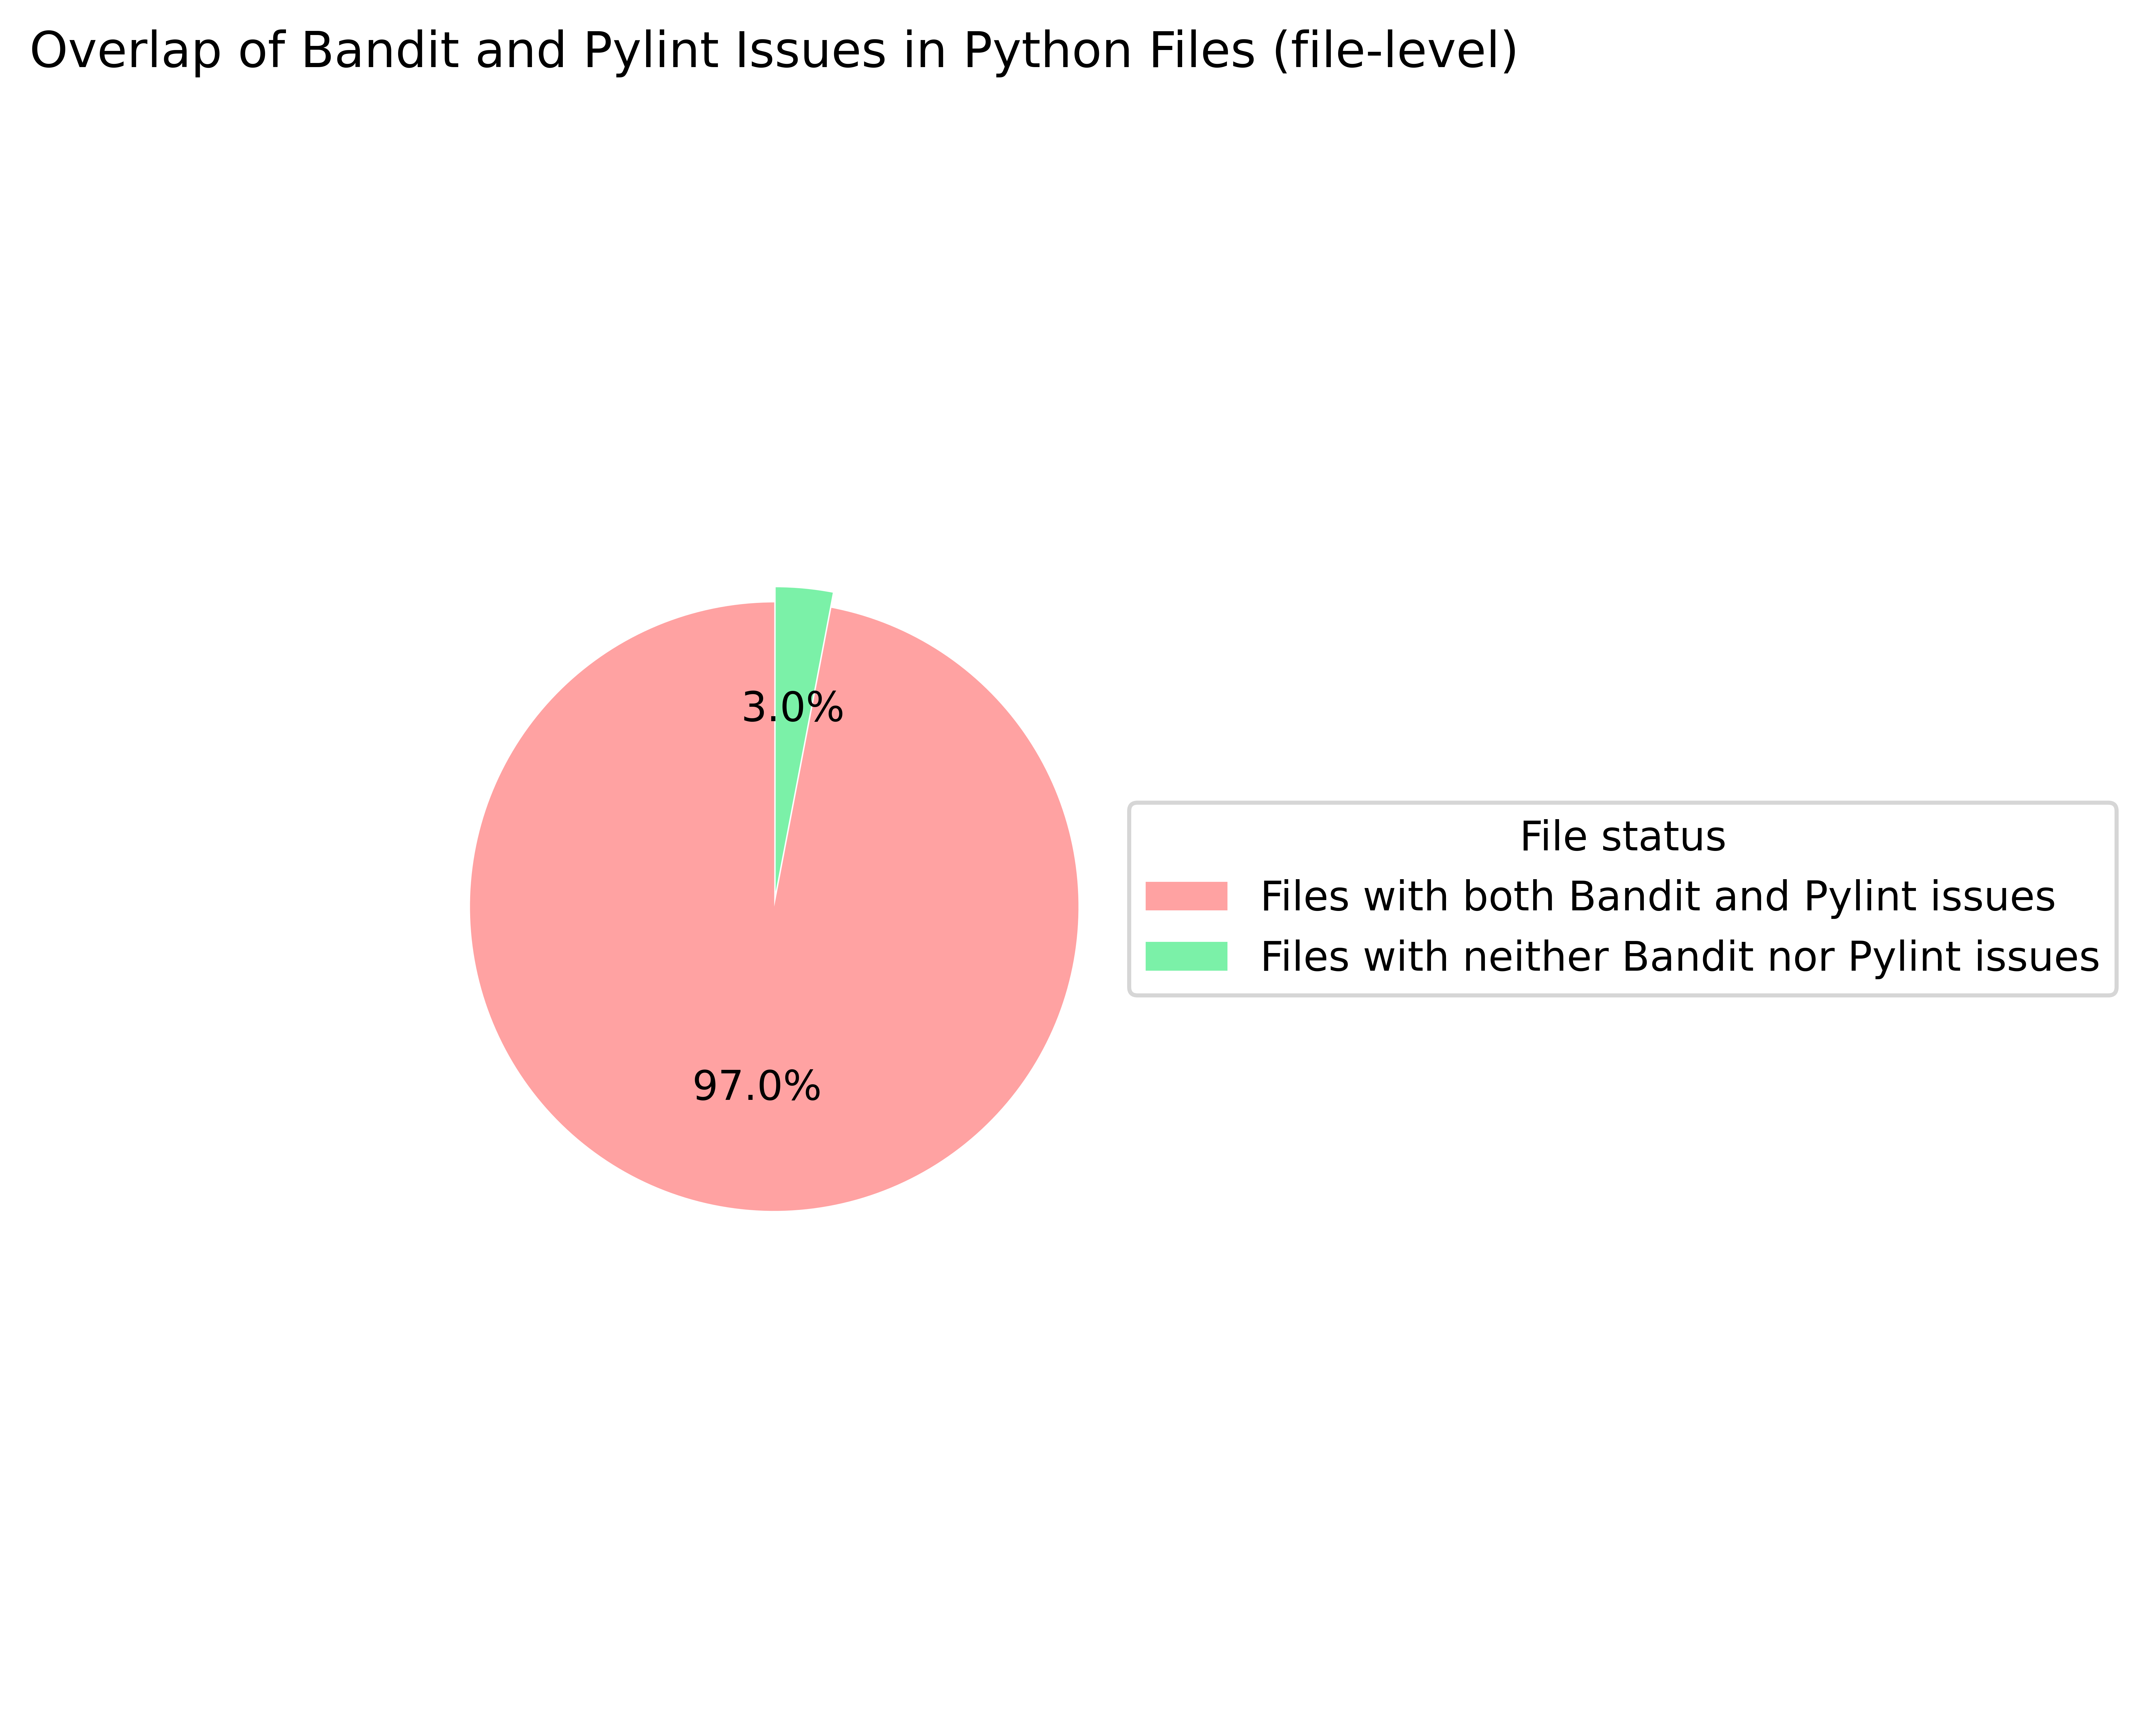

In [40]:
import matplotlib.pyplot as plt

both_issues = (
    (python_files_result["bandit_issues_total"] > 0)
    & (python_files_result["pylint_issues_total"] > 0)
).sum()

both_clean = (
    (python_files_result["bandit_issues_total"] == 0)
    & (python_files_result["pylint_issues_total"] == 0)
).sum()

sizes = [both_issues, both_clean]

legend_labels = [
    "Files with both Bandit and Pylint issues",
    "Files with neither Bandit nor Pylint issues",
]

colors = ["#FFA2A2", "#7BF1A8"]
explode = (0.05, 0.0)

plt.figure(figsize=(6, 6), dpi=1000)

wedges, texts, autotexts = plt.pie(
    sizes,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    explode=explode,
)

plt.legend(
    wedges,
    legend_labels,
    title="File status",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
)

plt.title(
    "Overlap of Bandit and Pylint Issues in Python Files (file-level)"
)

plt.axis("equal")
plt.tight_layout()
plt.show()

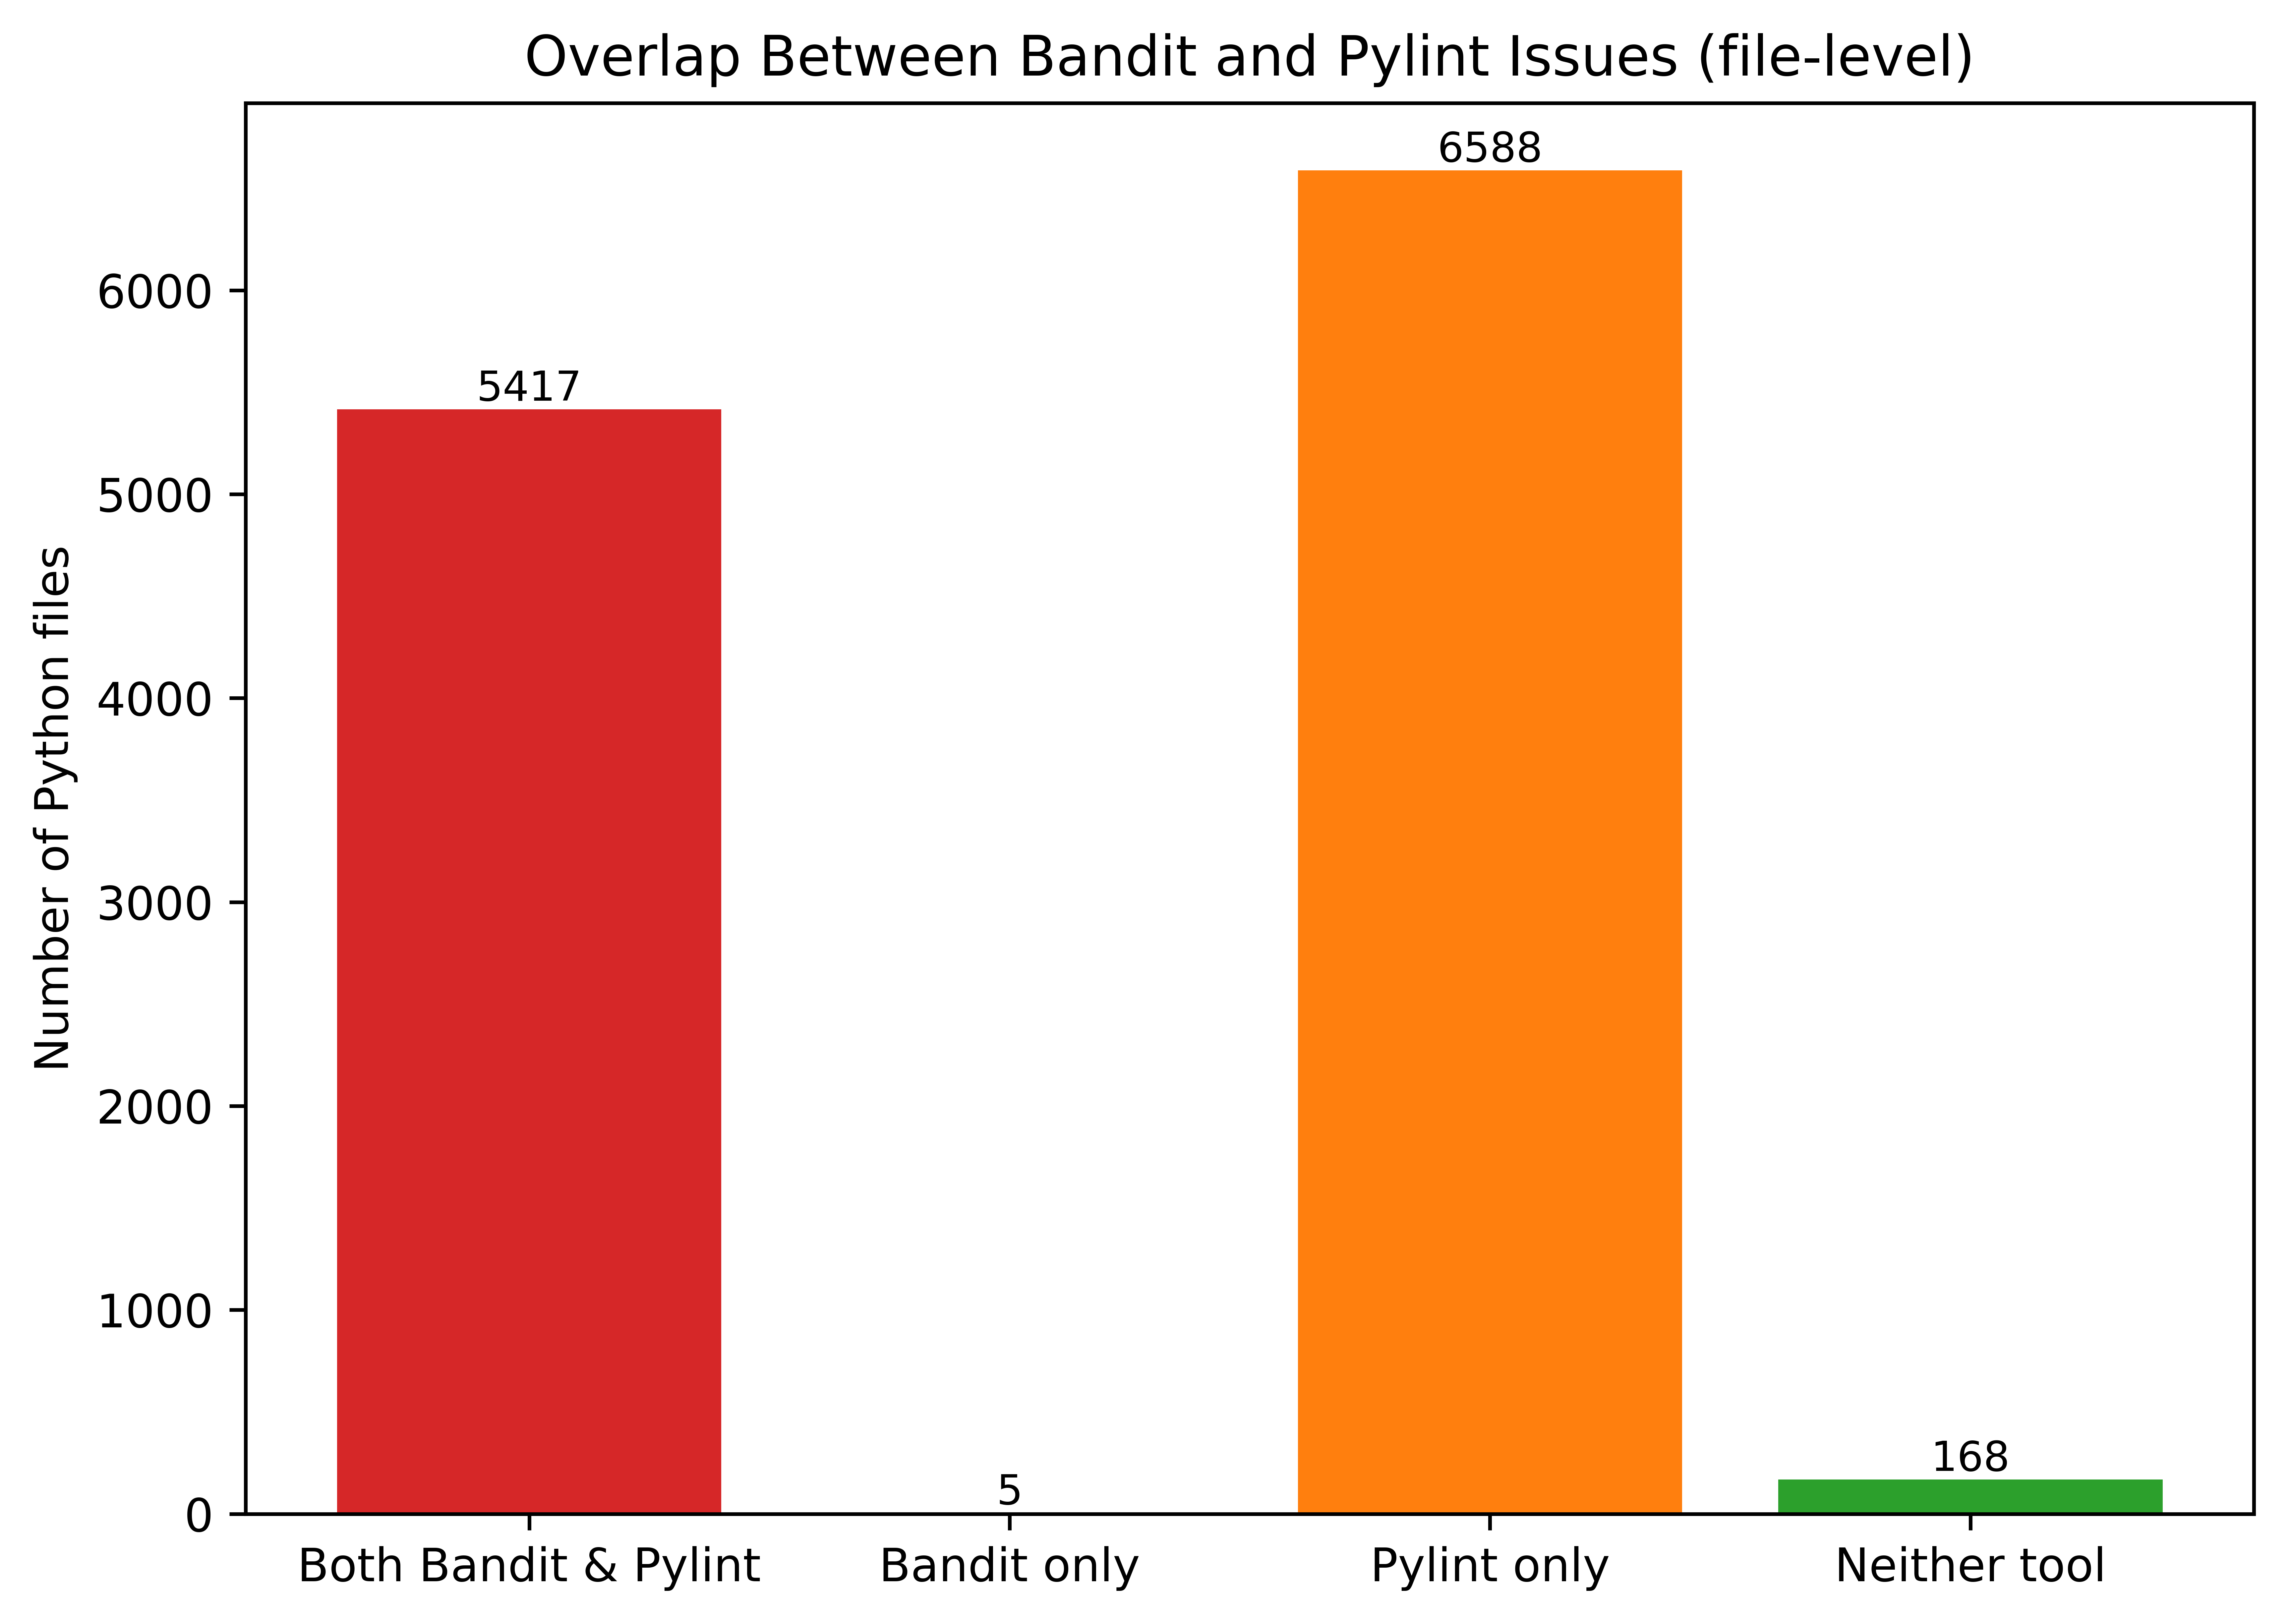

(np.int64(5417), np.int64(5), np.int64(6588), np.int64(168))

In [43]:
import matplotlib.pyplot as plt
both_issues = (
    (python_files_result["bandit_issues_total"] > 0)
    & (python_files_result["pylint_issues_total"] > 0)
).sum()

bandit_only = (
    (python_files_result["bandit_issues_total"] > 0)
    & (python_files_result["pylint_issues_total"] == 0)
).sum()

pylint_only = (
    (python_files_result["bandit_issues_total"] == 0)
    & (python_files_result["pylint_issues_total"] > 0)
).sum()

both_clean = (
    (python_files_result["bandit_issues_total"] == 0)
    & (python_files_result["pylint_issues_total"] == 0)
).sum()

labels = [
    "Both Bandit & Pylint",
    "Bandit only",
    "Pylint only",
    "Neither tool",
]

counts = [both_issues, bandit_only, pylint_only, both_clean]

colors = [
    "#d62728",  # red: both issues
    "#9467bd",  # purple: bandit only
    "#ff7f0e",  # orange: pylint only
    "#2ca02c",  # green: clean
]

plt.figure(figsize=(7, 5), dpi=1000)
bars = plt.bar(labels, counts, color=colors)

plt.title("Overlap Between Bandit and Pylint Issues (file-level)")
plt.ylabel("Number of Python files")
plt.xticks()

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()
plt.show()

both_issues, bandit_only, pylint_only, both_clean

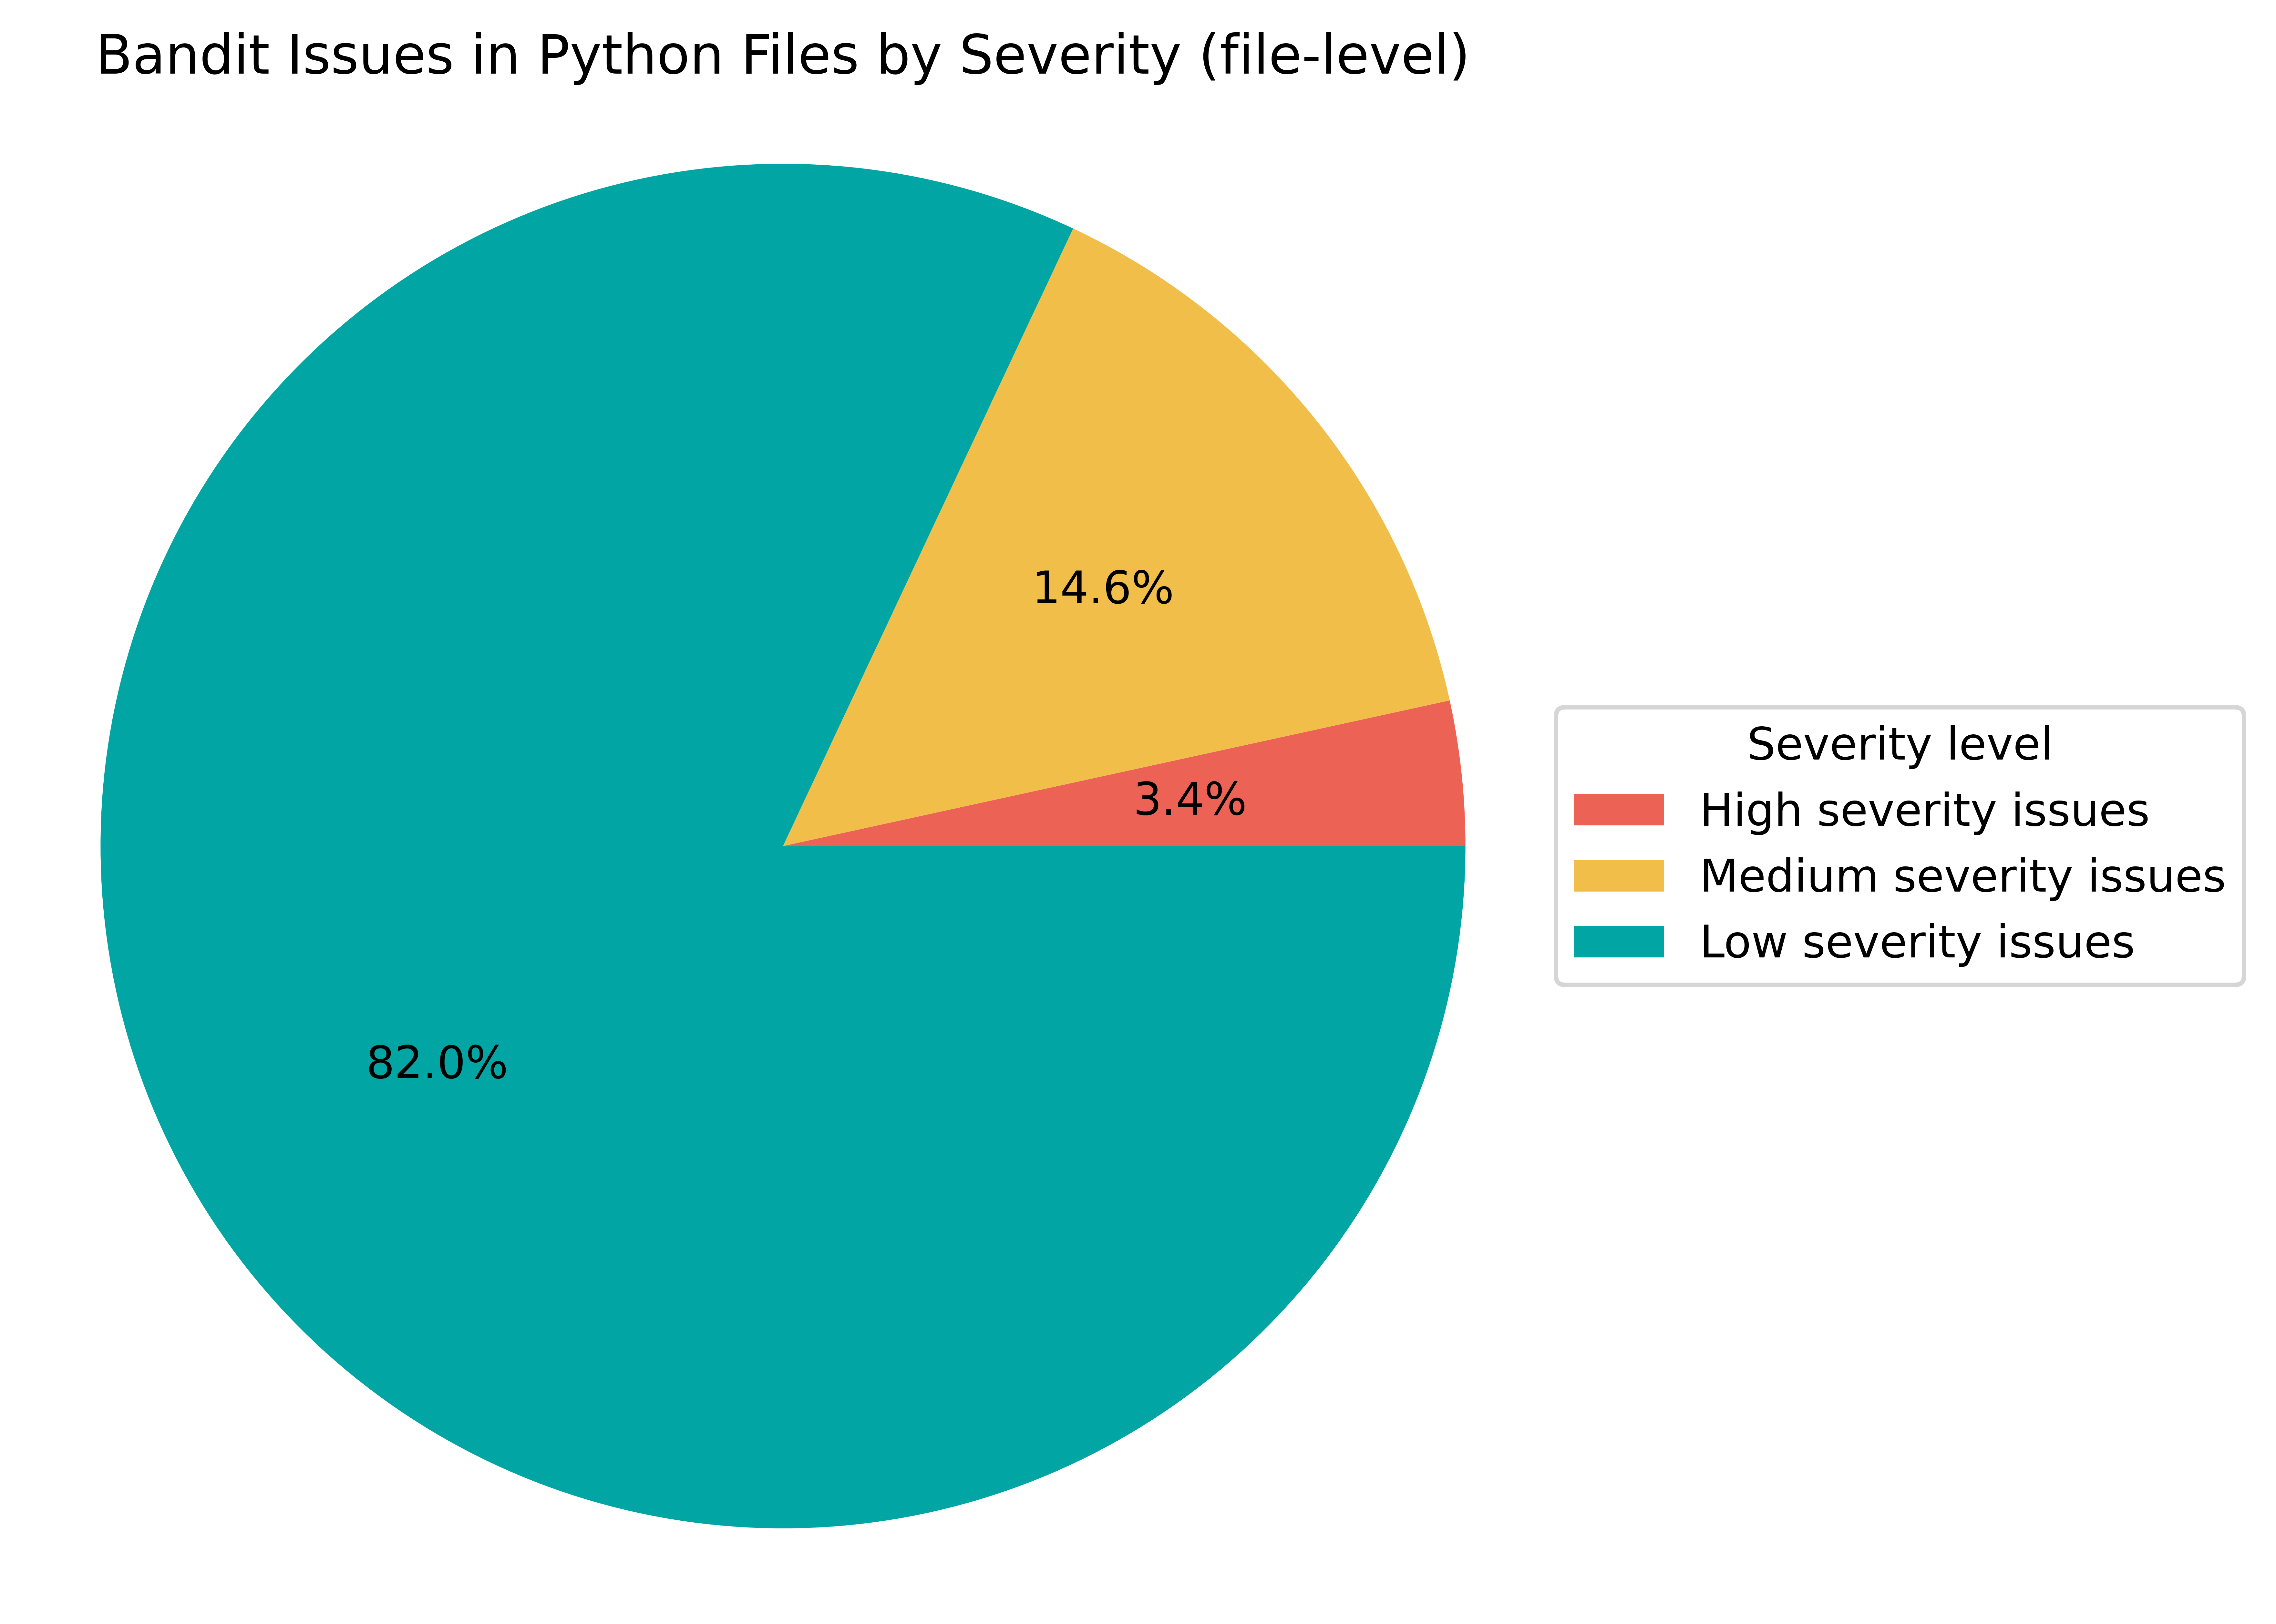

In [27]:
import matplotlib.pyplot as plt

high_files = (python_files_result["bandit_high"] > 0).sum()
medium_files = (python_files_result["bandit_medium"] > 0).sum()
low_files = (python_files_result["bandit_low"] > 0).sum()

sizes = [high_files, medium_files, low_files]
labels = [
    "High severity issues",
    "Medium severity issues",
    "Low severity issues",
]

colors = ["#ec6355", "#f2be4a", "#01a6a4"]

plt.figure(figsize=(6, 6), dpi=1000)

wedges, texts, autotexts = plt.pie(
    sizes,
    autopct="%1.1f%%",
    # startangle=90, 
    colors=colors,
)

# Legend instead of labels inside the pie
plt.legend(
    wedges,
    labels,
    title="Severity level",
    loc="center left",
    bbox_to_anchor=(1.0, 0.5),
)

plt.title(
    "Bandit Issues in Python Files by Severity (file-level)"
)

plt.axis("equal")
plt.show()

## Javascript results

In [44]:
import pandas as pd
js_files_result = pd.read_csv('javascript_static_analysis_file_level.csv')
js_files_result

,html_url,filename,tmp_path,eslint_error,eslint_warning,eslint_fatal,eslint_fixable_error,eslint_fixable_warning,eslint_sonarjs,eslint_unicorn,eslint_import,eslint_issues_total,eslint_ok,eslint_returncode,eslint_stderr
0,https://github.com/Shelf-nu/shelf.nu/pull/1905,docs/.vitepress/config.js,/Users/guanhao/Desktop/Coding-Agent-Code/AI-Co...,0,0,0,0,0,0,0,0,0,True,0,(node:3827) [MODULE_TYPELESS_PACKAGE_JSON] War...
1,https://github.com/dotCMS/core/pull/32561,dotCMS/src/main/webapp/html/js/dojo/custom-bui...,/Users/guanhao/Desktop/Coding-Agent-Code/AI-Co...,18,2,0,0,0,2,0,0,20,True,1,(node:3850) [MODULE_TYPELESS_PACKAGE_JSON] War...
2,https://github.com/mlflow/mlflow/pull/16533,.github/workflows/autoformat.js,/Users/guanhao/Desktop/Coding-Agent-Code/AI-Co...,5,0,0,0,0,0,0,0,5,True,1,(node:3873) [MODULE_TYPELESS_PACKAGE_JSON] War...
3,https://github.com/remotion-dev/remotion/pull/...,packages/docs/sidebars.js,/Users/guanhao/Desktop/Coding-Agent-Code/AI-Co...,1,0,0,0,0,0,0,0,1,True,1,(node:3896) [MODULE_TYPELESS_PACKAGE_JSON] War...
4,https://github.com/remotion-dev/remotion/pull/...,packages/template-recorder/postcss.config.js,/Users/guanhao/Desktop/Coding-Agent-Code/AI-Co...,0,0,0,0,0,0,0,0,0,True,0,(node:3919) [MODULE_TYPELESS_PACKAGE_JSON] War...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,https://github.com/jina-ai/deepsearch-ui/pull/34,app.js,/Users/guanhao/Desktop/Coding-Agent-Code/AI-Co...,198,3,0,0,0,3,0,0,201,True,1,(node:78742) [MODULE_TYPELESS_PACKAGE_JSON] Wa...
3213,https://github.com/neondatabase/website/pull/3161,src/app/(home-page)/page.jsx,/Users/guanhao/Desktop/Coding-Agent-Code/AI-Co...,1,0,1,0,0,0,0,0,1,True,1,(node:78765) [MODULE_TYPELESS_PACKAGE_JSON] Wa...
3214,https://github.com/neondatabase/website/pull/3161,src/components/pages/doc/modal/data.js,/Users/guanhao/Desktop/Coding-Agent-Code/AI-Co...,0,0,0,0,0,0,0,0,0,True,0,(node:78788) [MODULE_TYPELESS_PACKAGE_JSON] Wa...
3215,https://github.com/neondatabase/website/pull/3161,src/components/pages/doc/modal/modal.jsx,/Users/guanhao/Desktop/Coding-Agent-Code/AI-Co...,1,0,1,0,0,0,0,0,1,True,1,(node:78811) [MODULE_TYPELESS_PACKAGE_JSON] Wa...
